Trying to get a better understanding of various data analysis packages in Python, I thought it would be a good idea to work through the ISLR, using Python instead of R. Many default tools in R are only available as outside packages in Python, so in many cases, it won't be as easy to do this in Python, but it shouldn't be too difficult. We'll start with the exercises found in the applied section in chapter 3.

**8: This question involves the use of simple linear regression on the Auto data set.**

**(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:**

**i. Is there a relationship between the predictor and the response?**

**ii. How strong is the relationship between the predictor and the response?**

**iii. Is the relationship between the predictor and the response positive or negative?**

**iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# use ggplot style graphics
plt.style.use('ggplot')

# change the options so that we get the data in wide form with no wrap
pd.set_option('expand_frame_repr', False)

# read in the data, and take a look at the first few rows
auto = pd.read_csv('C:/Users/ben/Desktop/islr/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


**(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results.**

Before we fit a model, we should do a quick plot to see if it even makes sense to fit a linear model.

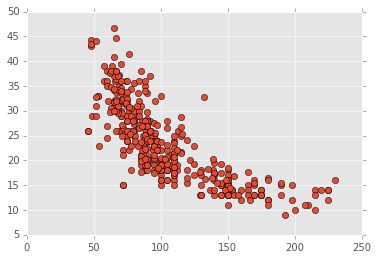

OLS Regression Results 
 
 Dep. Variable: mpg R-squared: 0.606 
 
 
 Model: OLS Adj. R-squared: 0.605 
 
 
 Method: Least Squares F-statistic: 599.7 
 
 
 Date: Fri, 15 Apr 2016 Prob (F-statistic): 7.03e-81 
 
 
 Time: 22:19:16 Log-Likelihood: -1178.7 
 
 
 No. Observations: 392 AIC: 2361. 
 
 
 Df Residuals: 390 BIC: 2369. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const 39.9359 0.717 55.660 0.000 38.525 41.347 
 
 
 horsepower -0.1578 0.006 -24.489 0.000 -0.171 -0.145 
 
 
 
 
 Omnibus: 16.432 Durbin-Watson: 0.920 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 17.305 
 
 
 Skew: 0.492 Prob(JB): 0.000175 
 
 
 Kurtosis: 3.299 Cond. No. 322.

In [2]:
%matplotlib inline
plt.figure()
plt.plot(auto['horsepower'], auto['mpg'], 'o')
plt.show()

# Python doesn't have a built-in linear model function, but statsmodels will do
# There are some NAs that need to be removed.

auto_comp = auto[['horsepower', 'mpg']].dropna()
X = auto_comp['horsepower']

# To get an intercept in the model, we need to use the add_constant method

X = sm.add_constant(X)
y = auto_comp['mpg']
sm_auto_1 = sm.OLS(y, X)
results = sm_auto_1.fit()
results.summary()

**i. Is there a relationship between the predictor and the response?**

There is strong evidence to suggest there is a relationship between the predictor and reponse (the overall F stat is highly significant, as is the t stat for the horsepower coefficient.

**ii. How strong is the relationship between the predictor and the response?**

The t stat is highly significant (< .001), suggesting a strong relationship.

**iii. Is the relationship between the predictor and the response positive or negative?**

Looking at the coefficient (-0.1578), it's clearly negative.

**iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?**

For this, we need to get into code. Getting the prediction interval isn't difficult, but the confidence interval is.

In [4]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

print('Prediction: {}'.format(results.predict((1, 98))))
prdstd, int_l, int_u = wls_prediction_std(results, exog=(1, 98))
print('lower: {}, upper: {}'.format(int_l, int_u))

Prediction: [ 24.46707715]
lower: [ 14.80939607], upper: [ 34.12475823]


In [5]:
# this is a bit clumsy, but I needed to write a function that could do this for me.

from scipy import stats

def confidence_interval_pred(model, values, point, alpha=0.05):
    pred_value = model.fit().predict((1, point))
    mse = model.fit().mse_resid
    n = len(values)
    t_stat = abs(stats.t.ppf(alpha / 2, n - 2))
    under_2 = (1 / n) + (point - values.mean()) ** 2 / sum((values - values.mean())**2)
    bound = t_stat * (mse * under_2) ** (1/2)
    return pred_value, pred_value - bound, pred_value + bound

In [12]:
pred, int_l, int_u = confidence_interval_pred(sm_auto_1, X['horsepower'], 98)
print('Prediction: {}'.format(pred))
print('lower: {}, upper: {}'.format(int_l, int_u))

Prediction: [ 24.46707715]
lower: [ 23.97307896], upper: [ 24.96107534]


**(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.**

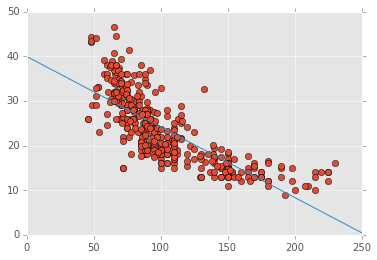

In [13]:
import numpy as np

X_plot = np.linspace(0, 250 ,100)
plt.figure()
plt.plot(X['horsepower'], y, 'o')
plt.plot(X_plot, X_plot*results.params[1] + results.params[0])

**(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.**

In [14]:
# There is no simple command to call all of them, so we have to do them individually.

plt.rcParams['figure.figsize'] = (10, 6)

plt.clf()
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.axhline()
plt.title('Residuals vs. Fitted')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

plt.clf()
sm.qqplot(results.resid / results.resid.std(), line='q')
plt.title('Normal QQ')
plt.ylabel('Studentized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.show()

plt.clf()
plt.scatter(x=results.fittedvalues, y = (results.resid / results.resid.std())**(.5))
plt.title('Scale-Location')
plt.ylabel('sqrt(Standardized Residuals)')
plt.xlabel('Fitted Values')
plt.show()

plt.clf()
sm.graphics.influence_plot(results, criterion="cooks")
# the graph isn't appearing scaled correctly, so the xlimits have to be set manually
# (this value was found after calling the plot initially)
plt.xlim(0, 0.04)
plt.show()